In [174]:
import pandas as pd
import numpy as np

In [175]:
data = pd.read_csv('../data/raw/usdjpy-tick-2025-01-01-2025-05-12.csv')

In [176]:
data.columns

Index(['timestamp', 'askPrice', 'bidPrice', 'askVolume', 'bidVolume'], dtype='object')

In [177]:
freq = '5min'

In [178]:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
data.set_index('timestamp', inplace=True)

In [179]:
data['spread'] = data['askPrice'] - data['bidPrice']
data['mid'] = (data['askPrice'] + data['bidPrice']) / 2
data['volume'] = data['bidVolume'] + data['askVolume']

In [182]:
data_resampled = data['mid'].resample(freq).ohlc()
data_resampled['volume'] = data['volume'].resample(freq).sum()
data_resampled['avg_spread'] = data['spread'].resample(freq).mean()
data_resampled['tick'] = data['volume'].resample(freq).count()

In [183]:
data_resampled.head()

,open,high,low,close,volume,avg_spread,tick
timestamp,,,,,,,
2025-01-01 22:00:00,157.227,157.2430,157.2270,157.2430,4.140000,0.141000,3
2025-01-01 22:05:00,157.245,157.2565,157.2280,157.2400,132.480004,0.075446,56
2025-01-01 22:10:00,157.239,157.2450,157.2305,157.2375,61.800001,0.074565,23
2025-01-01 22:15:00,157.240,157.2400,157.2370,157.2395,84.600003,0.074778,36
2025-01-01 22:20:00,157.240,157.2785,157.2260,157.2640,176.760004,0.108108,65


In [46]:
log_data = np.log(data)

<Axes: xlabel='timestamp'>

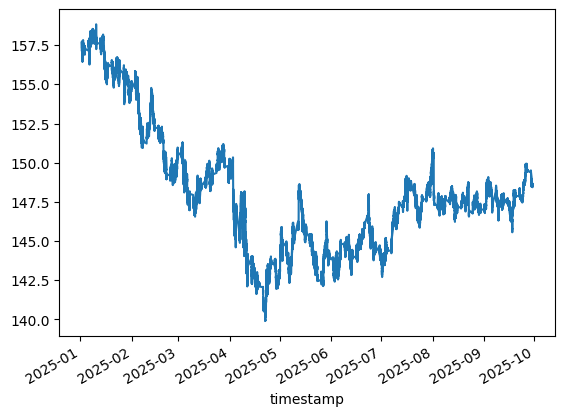

In [48]:
data['close'].plot()

<Axes: xlabel='timestamp'>

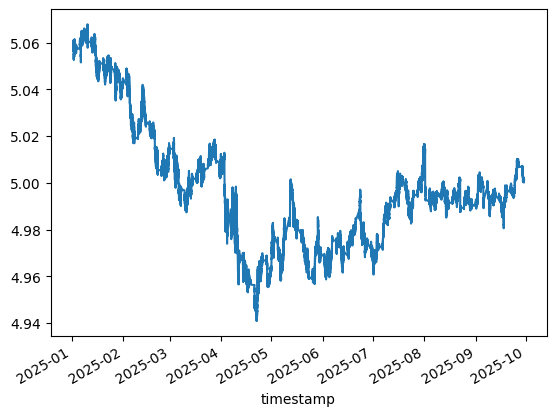

In [47]:
log_data['close'].plot()

In [50]:
data['return'] = data['close'].diff()
data['log_return'] = log_data['close'].diff()

<Axes: xlabel='timestamp'>

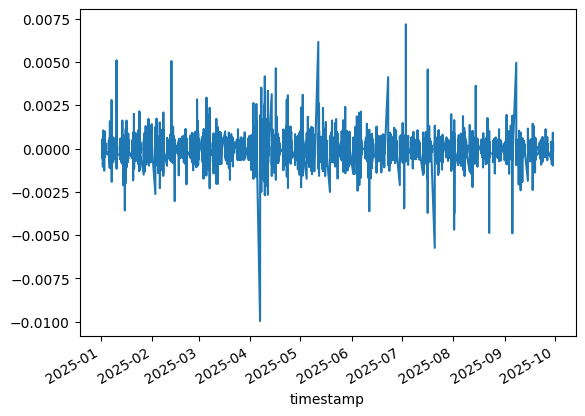

In [57]:
data['log_return'].plot()

<Axes: >

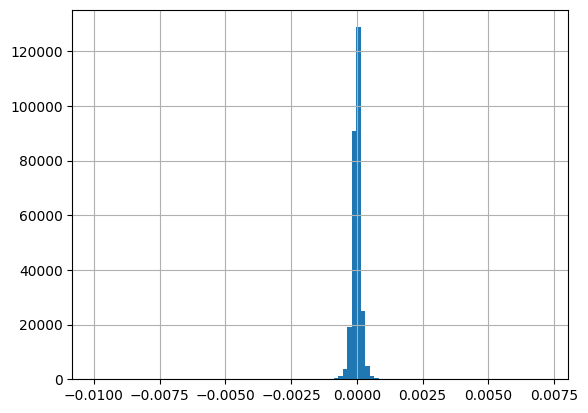

In [56]:
data['log_return'].hist(bins=100)

In [67]:
ret = data['log_return'].dropna()

<Axes: >

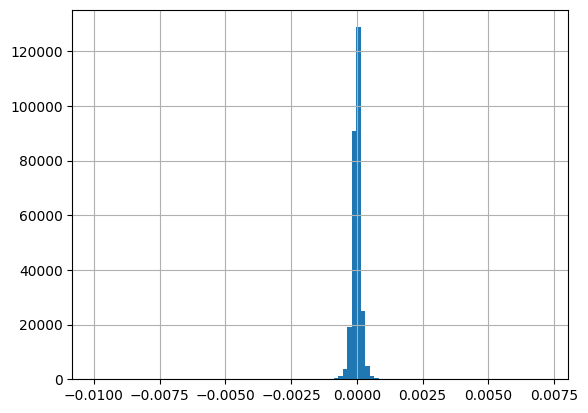

In [73]:
ret.hist(bins=100)

In [69]:
print(ret.min(), ret.max())
print(np.percentile(ret, [0.1, 99.9]))

-0.009957544217054526 0.007184332129209103
[-0.00094559  0.00094626]


<Axes: >

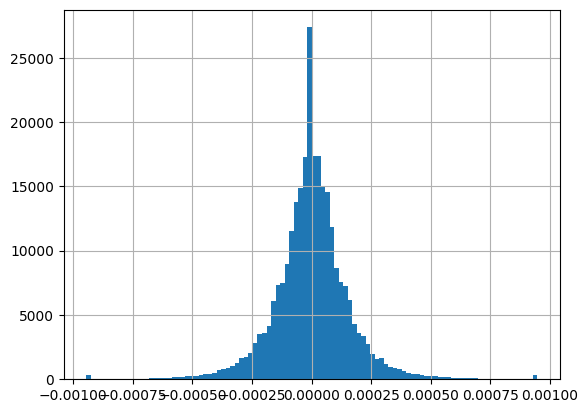

In [74]:
lower, upper = np.percentile(ret, [0.1, 99.9])
ret_clipped = np.clip(ret, lower, upper)

ret_clipped.hist(bins=100)

<Axes: >

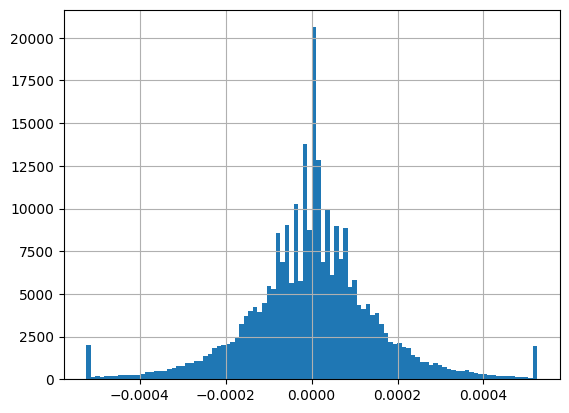

In [75]:
mean = ret.mean()
std = ret.std()
ret_clipped = np.clip(ret, mean - 3*std, mean + 3*std)
ret_clipped.hist(bins=100)